In [58]:
# Import packages needed
import numpy as np
import pandas as pd
import pickle
import os
os.environ["H5PY_DEFAULT_READONLY"] = "1" # Surpress h5py deprecation warnings
import socket
from datetime import datetime
import matplotlib.pyplot as plt
from astropy import units as u

In [59]:
# Read in candidate hits
candidates = pd.read_csv("/home/nstieg/candidates_indexed.csv")

### Look at the promising candidates (from investigating the stamps)

In [60]:
# List of indices of antennas that weren't SARFI from visual inspection
promising_indices = [448, 323, 51, 53, 54, 218, 52, 325, 220, 453, 451, 450] # Index in the candidate df
pcs = candidates.iloc[promising_indices]

In [61]:
# See where the promising candidates are from
print("Candidates are from: ", pcs.source_name.unique())

Candidates are from:  [3073619025268414208]


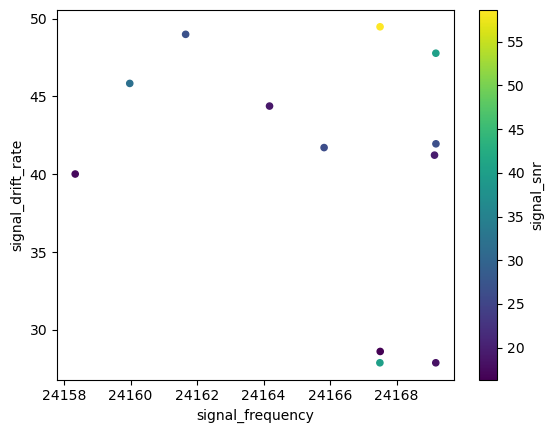

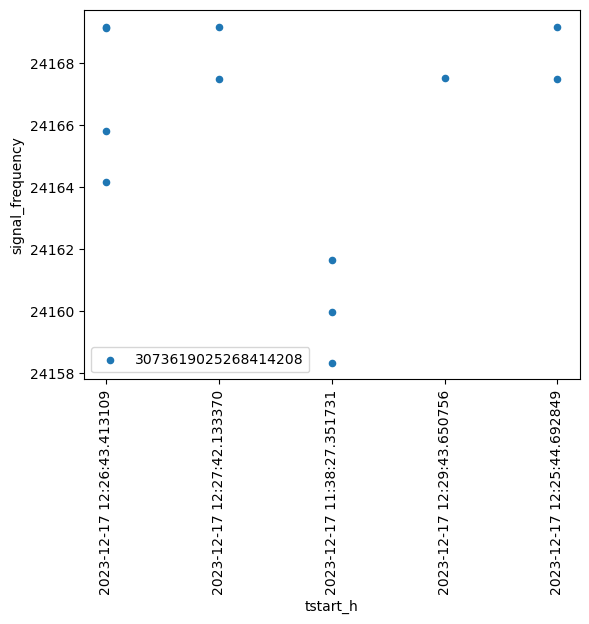

In [62]:
# Look at the signals that made it through
pcs.plot.scatter("signal_frequency", "signal_drift_rate", c="signal_snr")
plt.show()

for name, source in pcs.groupby("source_name"):
    source.plot.scatter("tstart_h", "signal_frequency", label=name)
plt.xticks(rotation=90)
plt.legend()
plt.show()

Text(0, 0.5, 'Count')

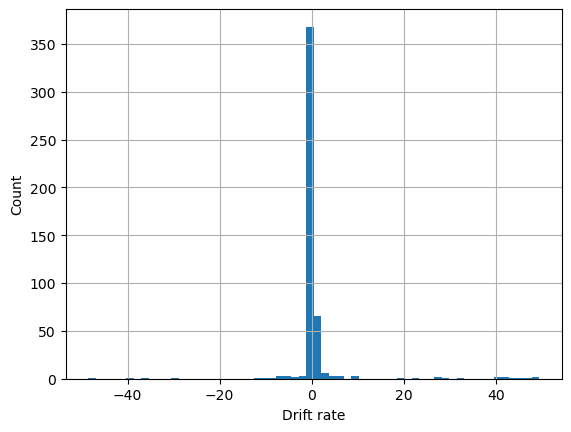

In [63]:
# Weird that all the signals are positive drift rate. What were in the original candidates?
candidates.signal_drift_rate.hist(bins=60)
plt.xlabel("Drift rate")
plt.ylabel("Count")

In [64]:
# Are any of the signals close in frequency?
f_values = pcs.signal_frequency.values
f_diffs = np.diff(sorted(f_values)) # Take the difference between adjacent frequencies
min_diff = min(f_diffs)
print("The minimum distance between two frequencies is", int(round(min_diff * 1e6, 0)), "hz")

The minimum distance between two frequencies is 2127 hz


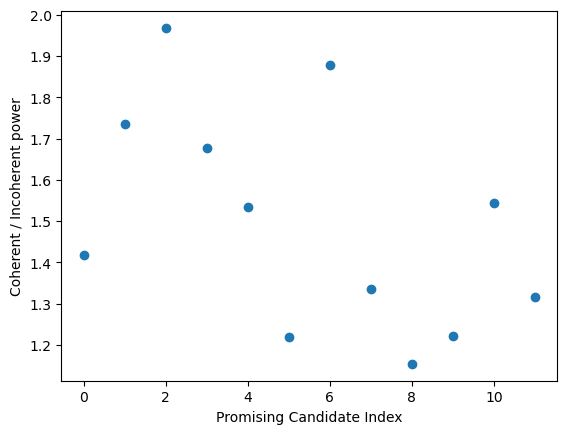

In [65]:
# Look at the ratio of coh/incoh power. Expect to be >1 for genuine signals
plt.scatter(range(len(pcs)), pcs.signal_power / pcs.signal_incoherent_power)
plt.xlabel("Promising Candidate Index")
plt.ylabel("Coherent / Incoherent power")
plt.show()

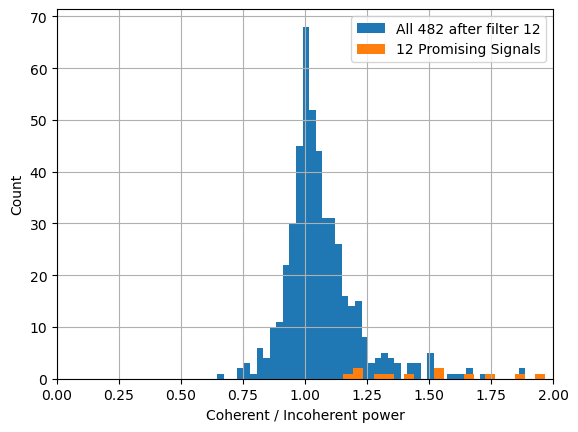

In [66]:
# Look at this compared to the general candidates
(candidates.signal_power / candidates.signal_incoherent_power).hist(bins=50, label=f"All {len(candidates)} after filter 12")
(pcs.signal_power / pcs.signal_incoherent_power).hist(bins=20, label="12 Promising Signals")
plt.xlabel("Coherent / Incoherent power")
plt.ylabel("Count")
plt.xlim([0, 2])
plt.legend()
plt.show()